In [16]:
from scipy.optimize import fsolve
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
from math import isnan
from tqdm import tqdm

In [6]:
a = fsolve(f, 0.06, args=(1,11,0.15) )
print(a)
print(f(a,1,11,0.15))

[0.2752731]
[3.05311332e-16]


In [146]:
comb(2_000_000,60)

np.float64(1.3843328840311609e+296)

In [ ]:
pow(1-0.0001,2_000_000-60)

1.3701256127660493e-87

In [147]:
pow(0.0001,60)

1.0000000000000029e-240

In [2]:
from scipy.stats import binom
binom.cdf(2200, 2_000_000, 0.001)

np.float64(0.9999950032734763)

In [177]:
def f(epsilon,k,n,eta):
    return binom.cdf(k, n, epsilon)- eta
    sum_result = 0
    for i in range(0,k+1):
        #if isnan(comb(n,i)*pow(1-epsilon,n-i)):
         #   print(i,sum_result)
          #  input()
        sum_result += comb(n,i)*pow(epsilon,i)*pow(1-epsilon,n-i)
    return sum_result - eta

In [176]:
def solveEpsilon(k,n,eta,max_its=100, starting_point=None):
    starting_point = k/n if starting_point is None else _ #1# k/n #0.5
    epsilon = starting_point
    i = max_its
    while not (-1e-7<f(epsilon, k, n, eta) < 1e-7): #error bound 1e-7
        epsilon = fsolve(f, starting_point, args=(k,n,eta))
        starting_point /=1.05
        #print(starting_point)
        i-=1
        if i == 0:
            return -1
    #print(i)
    return epsilon



In [102]:
solveEpsilon(1,11,0.15)

0.09090909090909091
[1.66533454e-16]


array([0.2752731])

In [13]:
solveEpsilon(6_000_000_000,20_000_000_000,0.1)

0.2857142857142857
99


array([0.30000415])

  0%|          | 0/11000 [00:00<?, ?it/s]C:\Users\fabia\AppData\Local\Temp\ipykernel_2088\2755371456.py:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a_overinputs.append(fsolve(f, starter, args=(1,11,0.15) ))
100%|██████████| 11000/11000 [00:12<00:00, 859.83it/s]


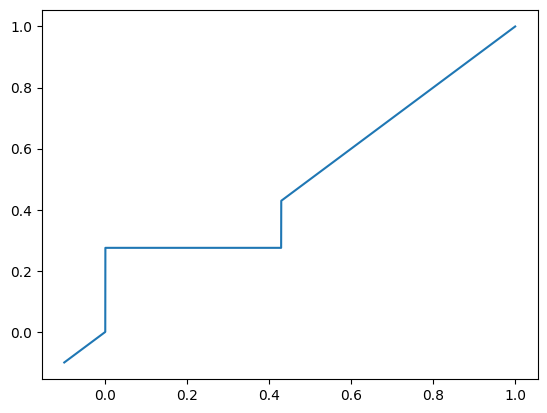

In [17]:
#We see that doing a direct fsolve, our solution is very much dependant on our input. But for small enough inputs, it stabilises (and otherwise, it converges to the identity function and doesnt make any progress)
inputs = np.arange(-0.1,1,0.0001)
a_overinputs = []
for starter in tqdm(inputs):
    a_overinputs.append(fsolve(f, starter, args=(1,11,0.15) ))
plt.plot(inputs, a_overinputs)

100%|██████████| 11000/11000 [00:16<00:00, 670.30it/s]


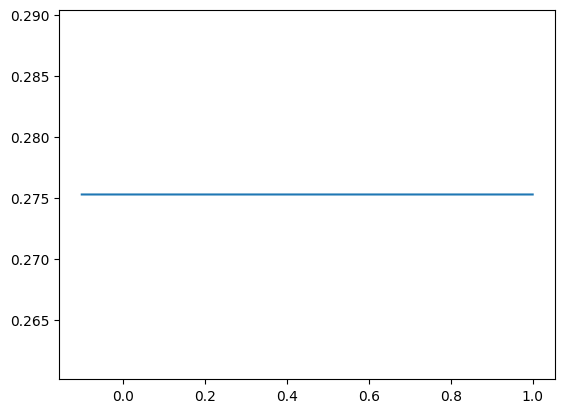

In [24]:
#By changing the starting point until our solution epsiolon gets the LHS and RHS of our equation close enough, we get a stable answer!
inputs = np.arange(-0.1,1,0.0001)
a_overinputs = []
for starter in tqdm(inputs):
    a_overinputs.append(solveEpsilon(1,11,0.15))
plt.plot(inputs, a_overinputs)

Plotting how our bound epsilon changes as k and beta changes

100%|██████████| 980/980 [00:01<00:00, 620.13it/s]


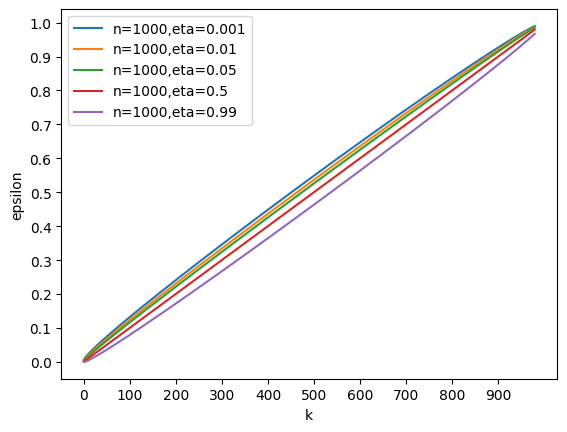

In [147]:
n=1000
ks = np.arange(0,980,1)

for beta in reversed([0.99,0.5,0.05,0.01,0.001]):
    epsilon_by_k = []
    for k in tqdm(ks):
        epsilon_by_k.append(solveEpsilon(k,n,beta))
    plt.plot(ks, epsilon_by_k, label=f"n=1000,eta={beta}")

plt.xticks(ks[::100])
plt.yticks(np.arange(0,1.01,0.1))
plt.xlabel("k")
plt.ylabel("epsilon")

plt.legend()
plt.show()

100%|██████████| 41/41 [00:00<00:00, 783.81it/s]


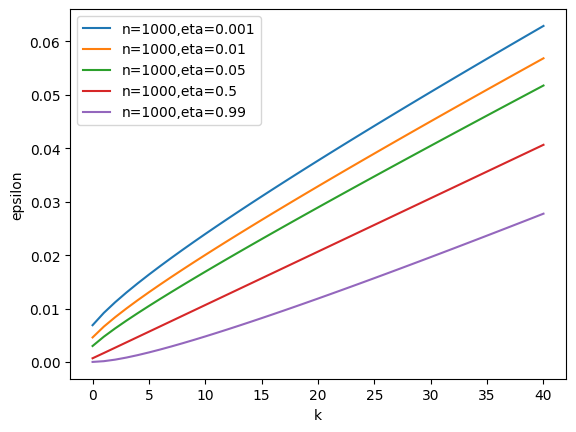

In [138]:
n=1000
ks = np.arange(0,40.6,1)

for beta in reversed([0.99,0.5,0.05,0.01,0.001]):
    epsilon_by_k = []
    for k in tqdm(ks):
        epsilon_by_k.append(solveEpsilon(k,n,beta))
    plt.plot(ks, epsilon_by_k, label=f"n=1000,eta={beta}")

plt.xticks(ks[::5])
#plt.yticks(np.arange(0,1.01,0.1))
plt.xlabel("k")
plt.ylabel("epsilon")


plt.legend()
plt.show()

100%|██████████| 27/27 [00:00<00:00, 654.38it/s]


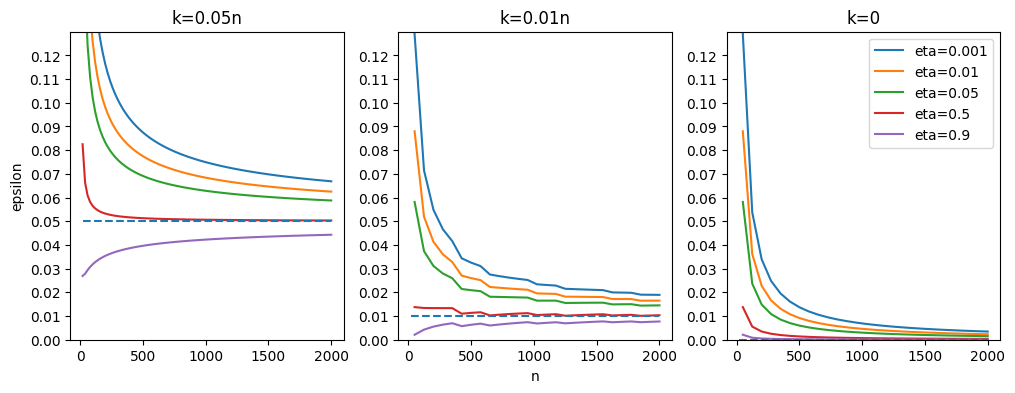

In [148]:
fix, axs = plt.subplots(1, 3, figsize=(12, 4))

ns = np.arange(20,2001,20)
percent_to_discard = 0.05


#########################
for beta in reversed([0.9,0.5,0.05,0.01,0.001]):
    epsilon_by_n = []
    for n in tqdm(ns):
        k=np.round(n*percent_to_discard)
        epsilon_by_n.append(solveEpsilon(k,n,beta))
    axs[0].plot(ns, epsilon_by_n, label=f"k={percent_to_discard}n,eta={beta}")
    
plt.xticks(ns[9::10])
#plt.yticks(np.arange(0,1.01,0.1))
axs[0].hlines(percent_to_discard,20,2000, linestyles="dashed")


#########################
ns = np.arange(50,2001,75)
percent_to_discard = 0.01



for beta in reversed([0.9,0.5,0.05,0.01,0.001]):
    epsilon_by_n = []
    for n in tqdm(ns):
        k=np.round(n*percent_to_discard)
        epsilon_by_n.append(solveEpsilon(k,n,beta))
    axs[1].plot(ns, epsilon_by_n, label=f"k={percent_to_discard}n,eta={beta}")


plt.xticks(np.arange(200,2001,200))
plt.yticks(np.arange(0,1,0.01))

axs[1].hlines(percent_to_discard,20,2000, linestyles="dashed")

#########################
ns = np.arange(50,2001,75)
percent_to_discard = 0#0.01



for beta in reversed([0.9,0.5,0.05,0.01,0.001]):
    epsilon_by_n = []
    for n in tqdm(ns):
        k=np.round(n*percent_to_discard)
        epsilon_by_n.append(solveEpsilon(k,n,beta))
    axs[2].plot(ns, epsilon_by_n, label=f"eta={beta}")


plt.yticks(np.arange(0,1,0.01))

axs[2].hlines(percent_to_discard,20,2000, linestyles="dashed")
#########################

axs[0].set_yticks(np.arange(0,0.121,0.01))
axs[1].set_yticks(np.arange(0,0.121,0.01))
axs[2].set_yticks(np.arange(0,0.121,0.01))

axs[0].set_ybound(0,0.13)
axs[1].set_ybound(0,0.13)
axs[2].set_ybound(0,0.13)

axs[0].set_xticks([0,500,1000,1500,2000])
axs[1].set_xticks([0,500,1000,1500,2000])
axs[2].set_xticks([0,500,1000,1500,2000])

axs[0].set_ylabel("epsilon")
axs[1].set_xlabel("n")

axs[0].set_title("k=0.05n")
axs[1].set_title("k=0.01n")
axs[2].set_title("k=0")


plt.legend()
plt.show()

100%|██████████| 27/27 [00:00<00:00, 2162.96it/s]


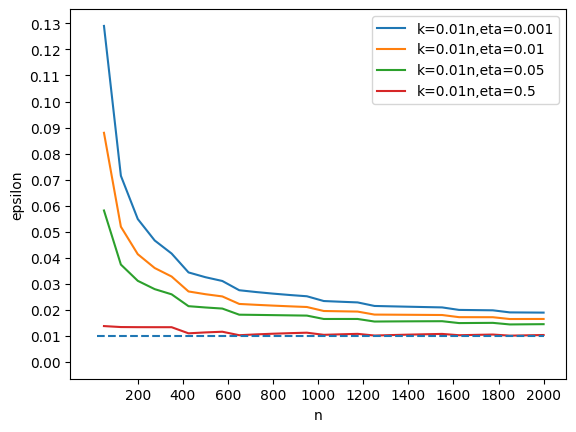

In [101]:
ns = np.arange(50,2001,75)
percent_to_discard = 0.01



for beta in reversed([0.5,0.05,0.01,0.001]):
    epsilon_by_n = []
    for n in tqdm(ns):
        k=np.round(n*percent_to_discard)
        epsilon_by_n.append(solveEpsilon(k,n,beta))
    plt.plot(ns, epsilon_by_n, label=f"k={percent_to_discard}n,eta={beta}")


plt.xticks(np.arange(200,2001,200))
plt.yticks(np.arange(0,1,0.01))
plt.xlabel("n")
plt.ylabel("epsilon")

plt.hlines(0,0,0, linestyles="dashed")
plt.hlines(percent_to_discard,20,2000, linestyles="dashed")

plt.legend()
plt.show()

100%|██████████| 27/27 [00:00<00:00, 2057.38it/s]


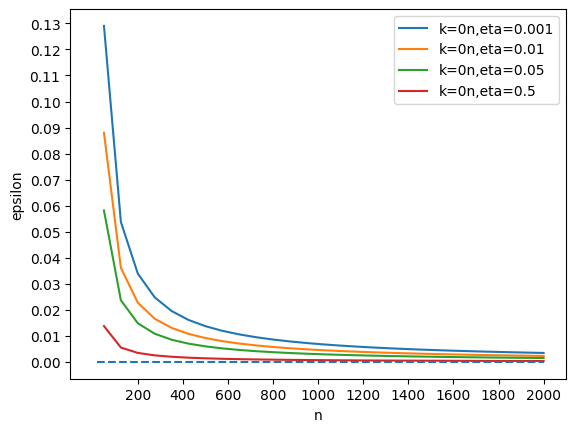

In [100]:
ns = np.arange(50,2001,75)
percent_to_discard = 0#0.01



for beta in reversed([0.5,0.05,0.01,0.001]):
    epsilon_by_n = []
    for n in tqdm(ns):
        k=np.round(n*percent_to_discard)
        epsilon_by_n.append(solveEpsilon(k,n,beta))
    plt.plot(ns, epsilon_by_n, label=f"k={percent_to_discard}n,eta={beta}")


plt.xticks(np.arange(200,2001,200))
plt.yticks(np.arange(0,1,0.01))
plt.xlabel("n")
plt.ylabel("epsilon")

plt.hlines(0,0,0, linestyles="dashed")
plt.hlines(percent_to_discard,20,2000, linestyles="dashed")

plt.legend()
plt.show()

# Trying Theorem 2 bounds

In [150]:
from scipy.optimize import fsolve
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
from math import isnan
from tqdm import tqdm
from scipy.stats import binom

In [276]:
def theorem2_epsiloneq(epsilon, k,K,n, gamma, eta):
    lhs = eta- binom.cdf(K-1,n-k, 1- gamma )#(1-binom.cdf(K-1,n-k, gamma )) - (1-eta)
    #print(f"lhs={lhs}")
    rhs = binom.cdf(n-K, n, epsilon)
    #print(f"rhs={rhs}")
    return lhs-rhs

#i think something is up here and the function has not quite been implemented right! also just check the theorem has been written out right too 
#then i wanna get some graphs shoiwng the theorem 2 bound for various K, gamma,and presumably it changes with eta and k as the other one
 #   then i wanna show corollary 2 and 3 how they produce gamma (/gamma hat) for various values 

In [ ]:
def solveEpsilon_t2(k,K,n,gamma,eta,max_its=1000, starting_point=None):
    starting_point = 1 if starting_point is None else _ 
    epsilon = starting_point
    i = max_its
    while epsilon<-1e4 or not (-1e-4<theorem2_epsiloneq(epsilon, k,K,n, gamma, eta) < 1e-4): #error bound 1e-7
        epsilon = fsolve(theorem2_epsiloneq, starting_point, args=(k,K,n,gamma,eta))
        starting_point -=0.001#/=1.05
        #print(starting_point)
        #print(theorem2_epsiloneq(epsilon, k,K,n, gamma, eta) )
        i-=1
        if i == 0:
            return -1
    #print(i)
    return epsilon

In [364]:
def solveEpsilon_t2_findK(k,n,gamma,eta,max_Ks=100, max_its=1000, starting_point=None):
    K_gap = (n-k)//max_Ks
    if K_gap ==0:
        K_gap = 1
    Ks = range(0,n-k+1,K_gap)

    valid_eKpairs = []
    sol_found = False #as we increase k, if we start to not have any solutions, then we can stop early
    for K in tqdm(Ks):
        epsilon = solveEpsilon_t2(k,K,n,gamma,eta,max_its=max_its, starting_point=starting_point)
        if epsilon != -1:
            valid_eKpairs.append((K,epsilon))
            sol_found = True
        elif sol_found:
            return valid_eKpairs #terminate early; no more solutions

    return valid_eKpairs

In [400]:
def solveEpsilon_t2_auto(k,n,gamma,eta,max_Ks=100, max_its=1000, starting_point=None):
    valid_eKpairs = solveEpsilon_t2_findK(k,n,gamma,eta,max_Ks=max_Ks, max_its=max_its, starting_point=starting_point)
    if valid_eKpairs == []:
        return -1

    min_epsilon = 1
    corresponding_K = None

    for K,e in valid_eKpairs:
        if e<min_epsilon: 
            min_epsilon=e
            corresponding_K=K
    return corresponding_K,min_epsilon

In [401]:
k=0
n=100
gamma = 0.1
solveEpsilon_t2_auto(k,n,gamma,0.01)

  0%|          | 0/101 [00:00<?, ?it/s]C:\Users\fabia\AppData\Local\Temp\ipykernel_2088\1695952006.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  epsilon = fsolve(theorem2_epsiloneq, starting_point, args=(k,K,n,gamma,eta))
 83%|████████▎ | 84/101 [00:24<00:04,  3.42it/s]


(82, array([0.2970168]))

[fig - n on x axis (probs longer range than figs 3.2 and 3.1 to show that it does take longer with this stuff to get it to converge to a ncie bound), epsilon on y axis found for optimum K as in mky alg,  k as a fixed proportion of n (0.01n) to show the same pattern as fg 3.2 but then varying eta too (litearlly just figure 3.2 again just mayeb  not all the subplo0ts ]

In [ ]:
etas = [0.9, 0.5, 0.05, 0.1, 0.001]
ns = range(100,2000, 100)
kprop = 0.01
gamma=0.01

epsilons_by_eta = {}
Ks_by_eta = {}

for eta in etas:
    print(f"-------------eta = {eta}-------------")
    print()
    epsilons = []
    Ks = []
    for n in ns:
        k=int(kprop*n)
        K,epsilon = solveEpsilon_t2_auto(k,n,gamma,eta)
        epsilons.append(epsilon)
        Ks.append(K)
    epsilons_by_eta[eta] = epsilons
    Ks_by_eta[eta] = Ks




-------------eta = 0.9-------------



  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\fabia\AppData\Local\Temp\ipykernel_2088\1695952006.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  epsilon = fsolve(theorem2_epsiloneq, starting_point, args=(k,K,n,gamma,eta))
 99%|█████████▉| 104/105 [00:54<00:00,  1.91it/s]


-------------eta = 0.5-------------



 68%|██████▊   | 73/108 [00:32<00:29,  1.17it/s]

gamma=0.001


  0%|          | 0/21 [00:00<?, ?it/s]C:\Users\fabia\AppData\Local\Temp\ipykernel_2088\1695952006.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  epsilon = fsolve(theorem2_epsiloneq, starting_point, args=(k,K,n,gamma,eta))
 95%|█████████▌| 20/21 [00:05<00:00,  3.63it/s]


gamma=0.1


 71%|███████▏  | 15/21 [00:03<00:01,  4.53it/s]


gamma=0.5


 29%|██▊       | 6/21 [00:01<00:04,  3.48it/s]


gamma=0.001


100%|██████████| 21/21 [00:07<00:00,  2.85it/s]


gamma=0.1


 90%|█████████ | 19/21 [00:06<00:00,  2.87it/s]


gamma=0.5


 48%|████▊     | 10/21 [00:02<00:02,  4.03it/s]


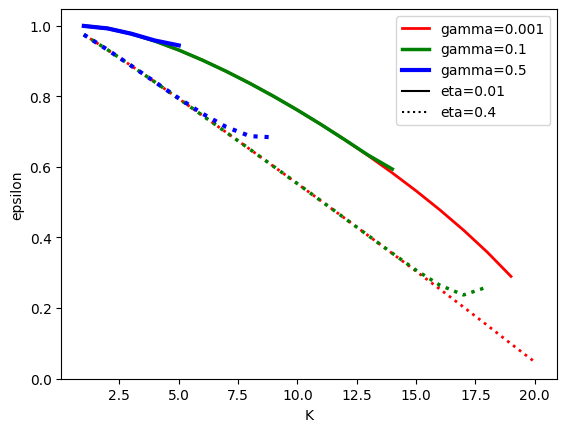

'do a big n to compare side by side, plot all otherwise identical'

In [390]:
colours = {0.001:'red',0.1:'green',0.5:'blue'}
widths = {0.001:2,0.1:2.5,0.5:3}



k=0
n=20
gammas = [0.001,0.1,0.5]


eta = 0.01
curves = {}
for gamma in gammas:
    print(f"gamma={gamma}")
    curves[gamma] = solveEpsilon_t2_findK(k,n,gamma,eta, max_Ks=100)

for key in curves.keys():
    xs = [x for x,y in curves[key]]
    ys = [y for x,y in curves[key]]

    if 1 not in ys:
        plt.plot(xs,ys, label=f"gamma={key}", color=colours[key],linewidth=widths[key])
    else:
        i=ys.index(1)
        plt.plot(xs[:i],ys[:i], label=f"gamma={key}",  color=colours[key],linewidth=widths[key])




eta = 0.4
curves = {}
for gamma in gammas:
    print(f"gamma={gamma}")
    curves[gamma] = solveEpsilon_t2_findK(k,n,gamma,eta, max_Ks=100)

for key in curves.keys():
    xs = [x for x,y in curves[key]]
    ys = [y for x,y in curves[key]]

    if 1 not in ys:
        plt.plot(xs,ys,  linestyle="dotted", color=colours[key], linewidth=widths[key])
    else:
        i=ys.index(1)
        plt.plot(xs[:i],ys[:i],  linestyle="dotted", color=colours[key],linewidth=widths[key])

plt.plot([], [], color="black", label="eta=0.01")
plt.plot([], [], linestyle="dotted", color="black", label=f"eta={eta}")

plt.legend()
plt.xlabel("K")
plt.ylabel("epsilon")
plt.show()

"do a big n to compare side by side, plot all otherwise identical"

gamma=0.001


  0%|          | 0/101 [00:00<?, ?it/s]C:\Users\fabia\AppData\Local\Temp\ipykernel_2088\1695952006.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  epsilon = fsolve(theorem2_epsiloneq, starting_point, args=(k,K,n,gamma,eta))
 99%|█████████▉| 100/101 [00:37<00:00,  2.64it/s]


gamma=0.1


 83%|████████▎ | 84/101 [00:24<00:05,  3.36it/s]


gamma=0.5


 39%|███▊      | 39/101 [00:05<00:08,  7.57it/s]


gamma=0.001


100%|██████████| 101/101 [00:43<00:00,  2.32it/s]


gamma=0.1


 89%|████████▉ | 90/101 [00:34<00:04,  2.58it/s]


gamma=0.5


 50%|████▉     | 50/101 [00:09<00:10,  5.00it/s]


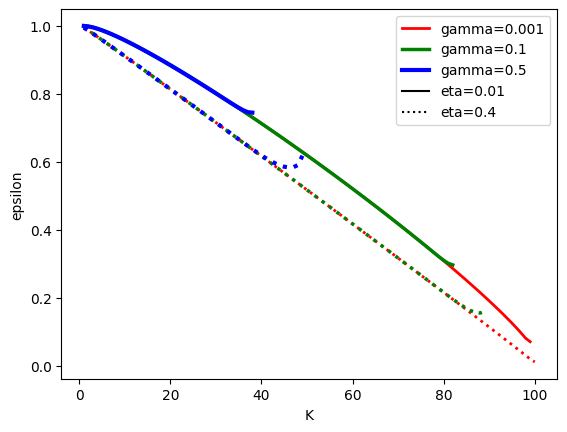

'do a big n to compare side by side, plot all otherwise identical'

In [387]:
colours = {0.001:'red',0.1:'green',0.5:'blue'}
widths = {0.001:2,0.1:2.5,0.5:3}



k=0
n=100
gammas = [0.001,0.1,0.5]


eta = 0.01
curves = {}
for gamma in gammas:
    print(f"gamma={gamma}")
    curves[gamma] = solveEpsilon_t2_findK(k,n,gamma,eta, max_Ks=100)

for key in curves.keys():
    xs = [x for x,y in curves[key]]
    ys = [y for x,y in curves[key]]

    if 1 not in ys:
        plt.plot(xs,ys, label=f"gamma={key}", color=colours[key],linewidth=widths[key])
    else:
        i=ys.index(1)
        plt.plot(xs[:i],ys[:i], label=f"gamma={key}",  color=colours[key],linewidth=widths[key])




eta = 0.4
curves = {}
for gamma in gammas:
    print(f"gamma={gamma}")
    curves[gamma] = solveEpsilon_t2_findK(k,n,gamma,eta, max_Ks=100)

for key in curves.keys():
    xs = [x for x,y in curves[key]]
    ys = [y for x,y in curves[key]]

    if 1 not in ys:
        plt.plot(xs,ys,  linestyle="dotted", color=colours[key], linewidth=widths[key])
    else:
        i=ys.index(1)
        plt.plot(xs[:i],ys[:i],  linestyle="dotted", color=colours[key],linewidth=widths[key])

plt.plot([], [], color="black", label="eta=0.01")
plt.plot([], [], linestyle="dotted", color="black", label=f"eta={eta}")

plt.legend()
plt.xlabel("K")
plt.ylabel("epsilon")
plt.show()

"do a big n to compare side by side, plot all otherwise identical"

gamma=0.001


  0%|          | 0/1001 [00:00<?, ?it/s]C:\Users\fabia\AppData\Local\Temp\ipykernel_2088\1695952006.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  epsilon = fsolve(theorem2_epsiloneq, starting_point, args=(k,K,n,gamma,eta))
100%|█████████▉| 999/1001 [11:15<00:01,  1.48it/s]


gamma=0.1


 89%|████████▉ | 894/1001 [09:56<01:11,  1.50it/s]


gamma=0.5


 49%|████▉     | 489/1001 [02:42<02:49,  3.01it/s]


gamma=0.001


100%|█████████▉| 999/1001 [12:20<00:01,  1.35it/s]


gamma=0.1


 90%|████████▉ | 900/1001 [09:50<01:06,  1.53it/s]


gamma=0.5


 50%|████▉     | 499/1001 [03:00<03:01,  2.76it/s]


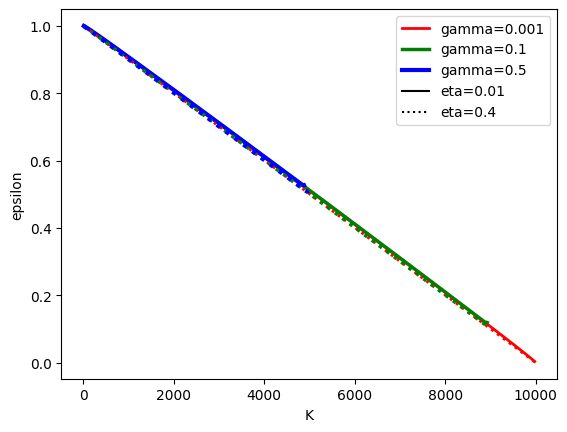

'do a big n to compare side by side, plot all otherwise identical'

In [388]:
colours = {0.001:'red',0.1:'green',0.5:'blue'}
widths = {0.001:2,0.1:2.5,0.5:3}



k=0
n=10_000
gammas = [0.001,0.1,0.5]


eta = 0.01
curves = {}
for gamma in gammas:
    print(f"gamma={gamma}")
    curves[gamma] = solveEpsilon_t2_findK(k,n,gamma,eta, max_Ks=1000)

for key in curves.keys():
    xs = [x for x,y in curves[key]]
    ys = [y for x,y in curves[key]]

    if 1 not in ys:
        plt.plot(xs,ys, label=f"gamma={key}", color=colours[key],linewidth=widths[key])
    else:
        i=ys.index(1)
        plt.plot(xs[:i],ys[:i], label=f"gamma={key}",  color=colours[key],linewidth=widths[key])




eta = 0.4
curves = {}
for gamma in gammas:
    print(f"gamma={gamma}")
    curves[gamma] = solveEpsilon_t2_findK(k,n,gamma,eta, max_Ks=1000)

for key in curves.keys():
    xs = [x for x,y in curves[key]]
    ys = [y for x,y in curves[key]]

    if 1 not in ys:
        plt.plot(xs,ys,  linestyle="dotted", color=colours[key], linewidth=widths[key])
    else:
        i=ys.index(1)
        plt.plot(xs[:i],ys[:i],  linestyle="dotted", color=colours[key],linewidth=widths[key])

plt.plot([], [], color="black", label="eta=0.01")
plt.plot([], [], linestyle="dotted", color="black", label=f"eta={eta}")

plt.legend()
plt.xlabel("K")
plt.ylabel("epsilon")
plt.show()

"do a big n to compare side by side, plot all otherwise identical"